## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [2]:
# Removing the mice with duplicate timepoints before adding in the metadata - as an idealistic 
# pharma analyst at pymaceuticals, I would keep the data blinded while cleaning it!

In [3]:
# Checking the number of mice.

len(study_results["Mouse ID"].unique())

249

In [4]:
study_results['Mouse ID'].count()

1893

In [5]:
mice = study_results["Mouse ID"].unique()

In [6]:
# for x in mice, if len of the rows with that id != len of unique rows with that id

In [7]:
study_results["Timepoint"].unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [8]:
problem_mice = []

for mouse in mice:
    check_rows = study_results.loc[study_results["Mouse ID"] == mouse,:]
    if len(check_rows["Timepoint"].unique()) != check_rows["Timepoint"].count():
                      problem_mice.append(mouse)

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

problem_mice

['g989']

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
study_results.loc[study_results["Mouse ID"] == problem_mice[0],:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_results = study_results.loc[study_results["Mouse ID"] != problem_mice[0],:]

In [12]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_results["Mouse ID"].unique())
# Dropped one Mouse ID

248

In [13]:
dropped = len(study_results.loc[study_results["Mouse ID"] == problem_mice[0],:])
study_results['Mouse ID'].count() == cleaned_results["Mouse ID"].count() + dropped
# didn't drop any extra rows

True

In [14]:
mouse_metadata=mouse_metadata.set_index("Mouse ID")

In [15]:
results = cleaned_results.join(mouse_metadata, on="Mouse ID", how="left")

In [16]:
results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped = results.groupby("Drug Regimen")

mean = grouped["Tumor Volume (mm3)"].mean()
median = grouped["Tumor Volume (mm3)"].median()
std = grouped["Tumor Volume (mm3)"].std()
sem = grouped["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

Summary = pd.DataFrame({"Mean Tumor Volume":mean,
                       "Median Tumor Volume":median,
                       "Standard Deviation":std,
                       "Standard Error":sem})
Summary

# Using the aggregation method, produce the same summary statistics in a single line


,Mean Tumor Volume,Median Tumor Volume,Standard Deviation,Standard Error
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

In [19]:
# Using pyplot
regimens = results["Drug Regimen"].unique()
measurements = grouped["Timepoint"].count()

measurements

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

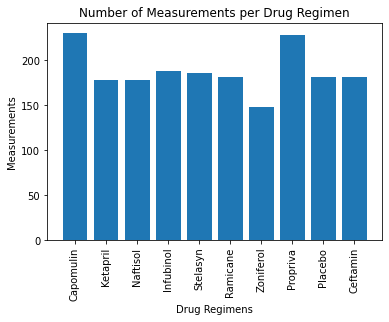

In [20]:
plt.bar(regimens, measurements)
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Measurements")
plt.xticks(rotation = 90)

<AxesSubplot:title={'center':'Number of Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Measurements'>

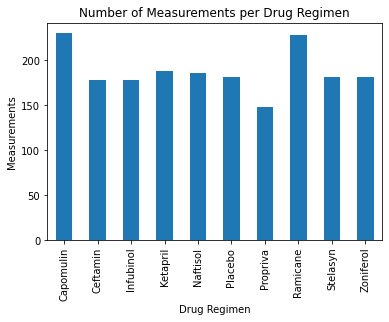

In [21]:
# using DataFrame.plot()

measurements.plot(kind="bar", rot="90", title="Number of Measurements per Drug Regimen", ylabel="Measurements")

In [22]:
mouse_metadata

,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,
k403,Ramicane,Male,21,16
s185,Capomulin,Female,3,17
x401,Capomulin,Female,16,15
m601,Capomulin,Male,22,17
g791,Ramicane,Male,11,16
...,...,...,...,...
z314,Stelasyn,Female,21,28
z435,Propriva,Female,12,26
z581,Infubinol,Female,24,25


In [23]:
mouse_metadata.drop(labels="g989", axis=0, inplace=True)
mouse_metadata

,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,
k403,Ramicane,Male,21,16
s185,Capomulin,Female,3,17
x401,Capomulin,Female,16,15
m601,Capomulin,Male,22,17
g791,Ramicane,Male,11,16
...,...,...,...,...
z314,Stelasyn,Female,21,28
z435,Propriva,Female,12,26
z581,Infubinol,Female,24,25


In [24]:
count_of_sex = mouse_metadata["Sex"].value_counts()


<AxesSubplot:title={'center':'Sex Distribution of Mice'}, ylabel='Number of Mice'>

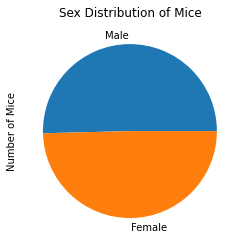

In [25]:
# Using dataframe.plot()

count_of_sex.plot(kind="pie", ylabel = "Number of Mice", title ="Sex Distribution of Mice", legend = False)

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = count_of_sex.keys()
# from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.keys.html


Text(0, 0.5, 'Number of Mice')

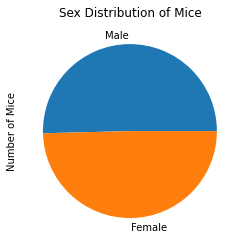

In [28]:
plt.pie(count_of_sex, labels=labels)
plt.title("Sex Distribution of Mice")
plt.ylabel("Number of Mice")

## Quartiles, Outliers and Boxplots

In [29]:
results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
promising = results.loc[(results["Drug Regimen"] == "Capomulin") | (results["Drug Regimen"] == "Ramicane") | (results["Drug Regimen"] == "Infubinol") | (results["Drug Regimen"] == "Ceftamin"),:]

In [63]:
# Start by getting the last (greatest) timepoint for each mouse

grouped_promising = promising.groupby("Mouse ID")
last_measurement_promising = grouped_promising.max()

In [64]:
last_measurement_promising = last_measurement_promising[["Timepoint"]]
last_measurement_promising.head()

,Timepoint
Mouse ID,
a203,45
a251,45
a275,45
a411,45
a444,45


In [65]:
last_measurement_promising = last_measurement_promising.rename(columns={"Timepoint": "Last Timepoint"})
last_measurement_promising.head()

,Last Timepoint
Mouse ID,
a203,45
a251,45
a275,45
a411,45
a444,45


In [69]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
promising = promising.join(last_measurement_promising, on="Mouse ID", how="left")

In [72]:
promising_final_results = promising.loc[promising["Timepoint"] == promising["Last Timepoint"] ,:]

In [73]:
promising_final_results
#Why did some mice only get measured at Timepoint 0?? Actually True??

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint
182,u153,0,45.000000,0,Ceftamin,Female,11,25,0
194,b447,0,45.000000,0,Ceftamin,Male,2,30,0
217,x226,0,45.000000,0,Ceftamin,Male,23,28,0
222,t573,0,45.000000,0,Ceftamin,Female,15,27,0
420,c326,5,36.321346,0,Infubinol,Female,18,25,5
...,...,...,...,...,...,...,...,...,...
1879,a644,45,32.978522,1,Ramicane,Female,7,17,45
1885,i177,45,33.562402,3,Ramicane,Male,10,18,45
1888,r944,45,41.581521,2,Capomulin,Male,12,25,45
1889,u364,45,31.023923,3,Capomulin,Male,18,17,45


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
